<a href="https://colab.research.google.com/github/syma-afsha/Complete_Reinforcement_Learning/blob/main/Optimistic_Initial_Value_vs_epsilion_greedy_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To tackle multi bandit problem,
Optimistic initial values are a simple technique to encourage exploration by setting initial action-value estimates 𝑄(𝑎) to high values not neutral values, 𝑄(𝑎)=0.

The agent will try each arm at least once until their Q(a) values start converging toward the observed rewards.

**Here, The "disappointment" effect means observed rewards being lower than the initial optimistic estimates, drives the agent to try other arms.**





In [147]:
import numpy as np
import matplotlib.pyplot as plt
class BanditProblem:
    def __init__(self, true_value, epsilion, initial_estimates, total_steps, step_size=None, non_stationary=False, change_interval=None, change_magnitude=None):
        """
        Initialize the Bandit Problem.
        - true_value: Array of true mean rewards for each arm.
        - epsilon: Probability of exploration.
        - total_steps: Total number of timesteps.
        - step_size: Step size for updating the mean reward (constant or None for decaying step size).
        - non_stationary: If True, the reward distribution changes over time.
        - change_interval: Number of steps between changes in true values.
        - change_magnitude: Magnitude of the random changes applied to true values.
        """
        self.true_value = np.array(true_value, dtype=float)
        self.epsilion = epsilion
        self.arm_number = len(true_value)
        self.total_steps = total_steps
        self.current_step = 0
        self.initial_estimates = np.array(initial_estimates, dtype=float)
        self.step_size = step_size
        self.non_stationary = non_stationary
        self.change_interval = change_interval
        self.change_magnitude = change_magnitude

        # Tracking variables
        self.how_many_time_particular_arm_is_selected = np.zeros(self.arm_number)
        self.arm_mean_rewards = self.initial_estimates.copy()
        self.mean_reward = np.zeros(total_steps + 1)
        self.arm_mean_rewards_history = np.zeros((self.arm_number, total_steps + 1))



    def update_true_values(self):
        """
        Dynamically update the true reward values for a non-stationary environment.
        """
        if self.non_stationary and self.current_step % self.change_interval == 0 and self.current_step>0:
            self.true_value += np.random.normal(0, self.change_magnitude, self.arm_number)


            # print(f"Step {self.current_step}:New values: {self.true_value}")
            # print(f"Mean Reward {self.mean_reward}")

    def select_action(self):
        """
        Select an arm using epsilon-greedy strategy and update rewards.
        """
        # Epsilon-greedy action selection
        probability = np.random.rand()
        if probability < self.epsilion:
            selected_index = np.random.choice(self.arm_number)  # Exploration
        else:
            selected_index = np.argmax(self.arm_mean_rewards)  # Exploitation

        # Simulate the reward for the selected arm
        reward = np.random.normal(self.true_value[selected_index], 1)

        # Determine step size
        if self.step_size is not None:
            step_size = self.step_size  # Constant step size
        else:
            # Decaying step size
            self.how_many_time_particular_arm_is_selected[selected_index] += 1
            step_size = 1 / self.how_many_time_particular_arm_is_selected[selected_index]

        # Update the estimated mean reward for the selected arm
        self.arm_mean_rewards[selected_index] += step_size * (reward - self.arm_mean_rewards[selected_index])


        # Update the overall mean reward
        self.mean_reward[self.current_step + 1] = self.mean_reward[self.current_step] + (
            1 / (self.current_step + 1)) * (reward - self.mean_reward[self.current_step])


        # Track the history of mean rewards for the selected arm
        self.arm_mean_rewards_history[:, self.current_step] = self.arm_mean_rewards

    def play_game(self):
        """
        Play the bandit game for the specified number of timesteps.
        """
        for t in range(self.total_steps):
            self.current_step = t
            self.update_true_values()
            self.select_action()


In [148]:
# Simulation parameters
true_values = [1, 3, 4]  # True mean rewards for 3 arms
initial_estimates_optimistic = [5, 5, 5]  # Optimistic initial estimates
initial_estimates_neutral = [0, 0, 0]  # Neutral initial estimates
alpha = 0.1  # Constant step size
eps = 0.1  # Epsilion for exploration
total_steps = 10000  # Total timesteps

bandit_stationary_optimistic= BanditProblem(
    true_value=true_values,
    initial_estimates=initial_estimates_optimistic,
    step_size=None,
    epsilion=0.0,
    total_steps=total_steps,
    non_stationary=False,
    change_interval=None,
    change_magnitude=None



)
bandit_stationary_optimistic.play_game()

# Neutral
bandit_stationary_neutral = BanditProblem(
    true_value=true_values,
    initial_estimates=initial_estimates_neutral,
    step_size=None,
    epsilion=eps,
    total_steps=total_steps,
    non_stationary=False,
    change_interval=None,
    change_magnitude=None
)
bandit_stationary_neutral.play_game()


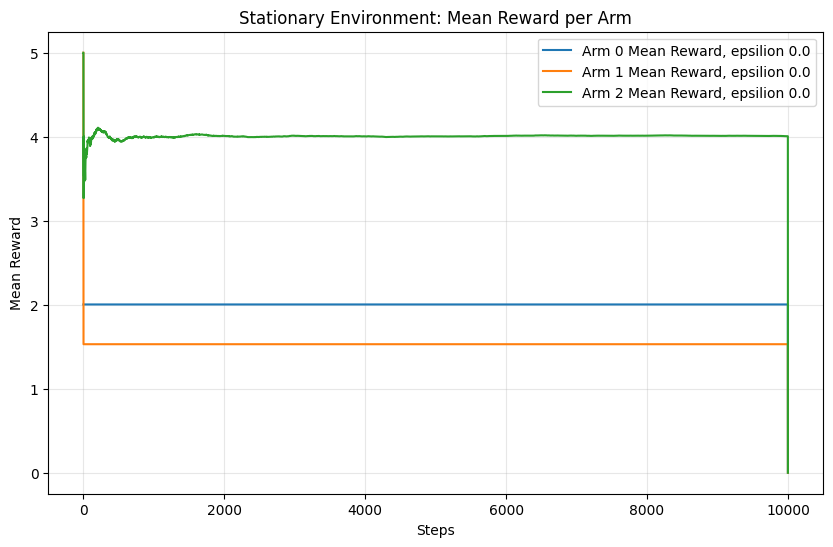

In [149]:
# Plot mean reward history for each arm
plt.figure(figsize=(10, 6))
for i in range(bandit_stationary_optimistic.arm_number):
    plt.plot(
        bandit_stationary_optimistic.arm_mean_rewards_history[i],
        label=f"Arm {i} Mean Reward, epsilion 0.0"
    )

# Add labels, title, legend, and grid
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.title("Stationary Environment: Mean Reward per Arm")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

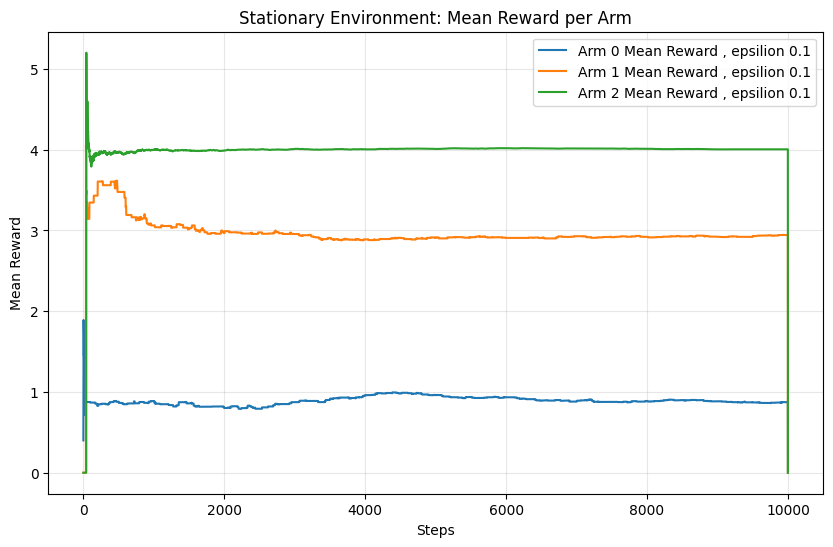

In [155]:
# Plot mean reward history for each arm
plt.figure(figsize=(10, 6))
for i in range(bandit_stationary_neutral.arm_number):
    plt.plot(
        bandit_stationary_neutral.arm_mean_rewards_history[i],
        label=f"Arm {i} Mean Reward , epsilion {eps}"
    )

# Add labels, title, legend, and grid
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.title("Stationary Environment: Mean Reward per Arm")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

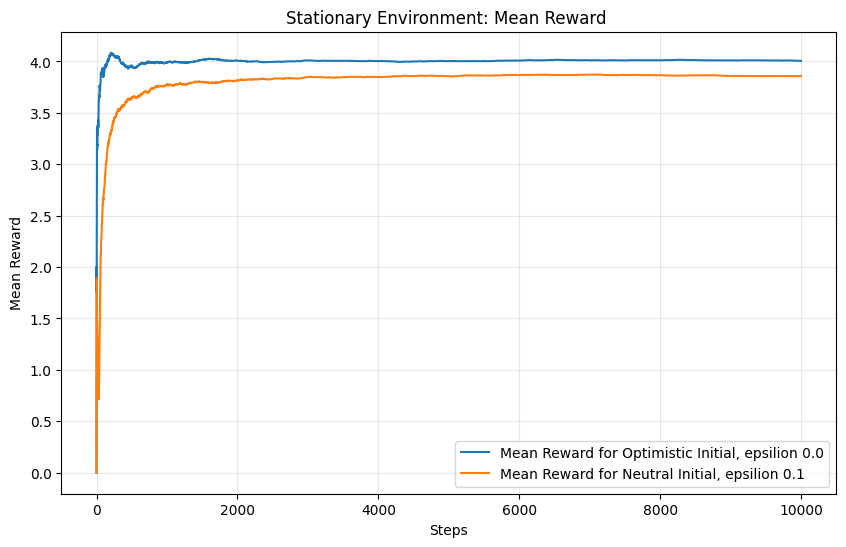

In [151]:
# Plot mean reward history for each arm
plt.figure(figsize=(10, 6))

plt.plot(
    bandit_stationary_optimistic.mean_reward,
    label=f"Mean Reward for Optimistic Initial, epsilion 0.0"
)
plt.plot(bandit_stationary_neutral.mean_reward, label=f"Mean Reward for Neutral Initial, epsilion {eps}")

# Add labels, title, legend, and grid
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.title("Stationary Environment: Mean Reward ")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

From this graph, we can see that the **optimistic initial value** provides better result, Faster convergence to the optimal mean reward compared to the neutral initial values.


# Non Stationary Environment

In [152]:
bandit_non_stationary_optimistic= BanditProblem(
    true_value=true_values,
    initial_estimates=initial_estimates_optimistic,
    step_size=alpha,
    epsilion=0.0,
    total_steps=total_steps,
    non_stationary=True,
    change_interval=2000,
    change_magnitude=1.0



)
bandit_non_stationary_optimistic.play_game()


bandit_non_stationary_neutral= BanditProblem(
    true_value=true_values,
    initial_estimates=initial_estimates_neutral,
    step_size=alpha,
    epsilion=0.1,
    total_steps=total_steps,
    non_stationary=True,
    change_interval=2000,
    change_magnitude=1.0



)
bandit_non_stationary_neutral.play_game()


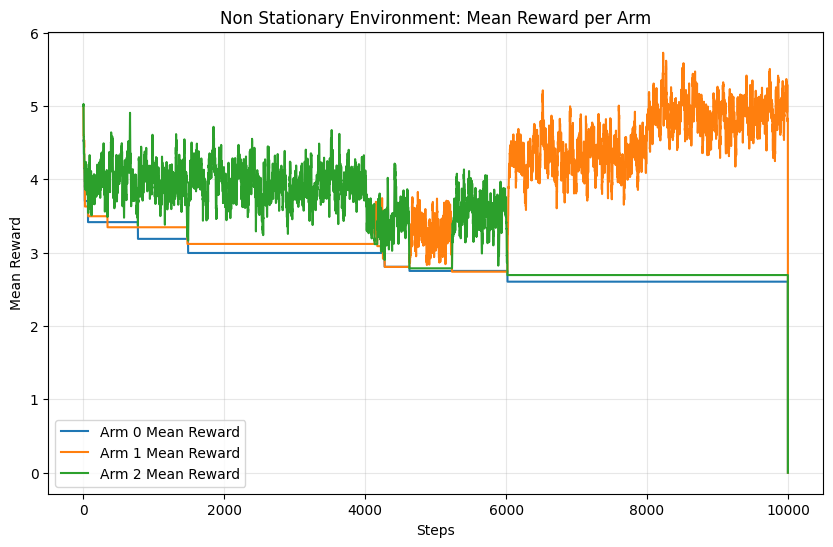

In [153]:
# Plot mean reward history for each arm
plt.figure(figsize=(10, 6))
for i in range(bandit_non_stationary_optimistic.arm_number):
    plt.plot(
        bandit_non_stationary_optimistic.arm_mean_rewards_history[i],
        label=f"Arm {i} Mean Reward"
    )

# Add labels, title, legend, and grid
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.title("Non Stationary Environment: Mean Reward per Arm")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

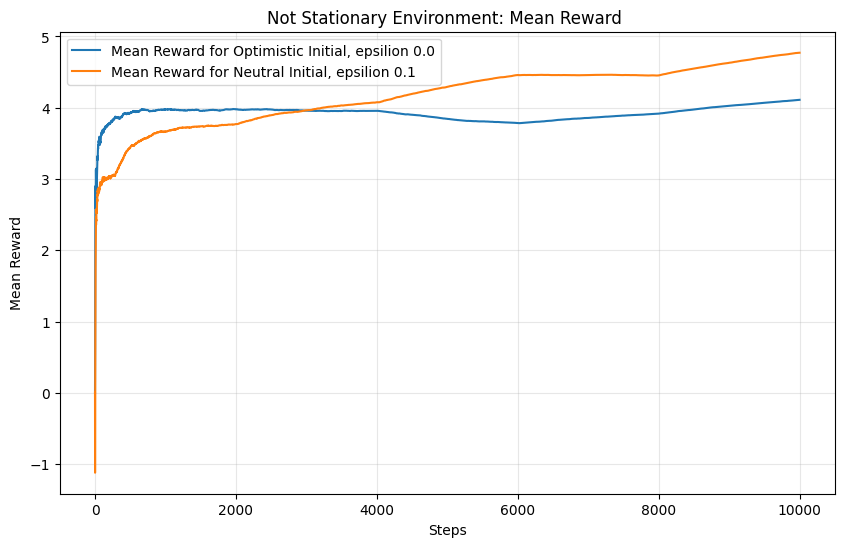

In [154]:
# Plot mean reward history for each arm
plt.figure(figsize=(10, 6))

plt.plot(
    bandit_non_stationary_optimistic.mean_reward,
    label=f"Mean Reward for Optimistic Initial, epsilion 0.0"
)
plt.plot(bandit_non_stationary_neutral.mean_reward, label=f"Mean Reward for Neutral Initial, epsilion {eps}")

# Add labels, title, legend, and grid
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.title("Not Stationary Environment: Mean Reward ")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Epsilon-greedy achieves a higher mean reward because it can adapt to the changing environment, where it gives weight to the recent reward.

**Optimistic Initial values doesnot work well in the non stationary environment because it explores all arms early because the observed rewards (R(a)) are lower than the optimistic Q(a) values.**

When the true rewards change, but the agent does not re-explore because it is now exploiting the arm with the highest Q(a).

**The agent fails to adapt to the new environment, leading to suboptimal performance in the long run.**

